In [2]:
pip install tensorflow

     |████████████████████████████████| 217.5 MB 5.2 MB/s eta 0:00:012
     |████████████████████████████████| 5.8 MB 10.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 7.1 MB/s eta 0:00:01
     |████████████████████████████████| 13.0 MB 14.1 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 10.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 7.4 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 8.8 MB/s  eta 0:00:01
     |████████████████████████████████| 4.3 MB 15.2 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 4.5 MB/s  eta 0:00:01
     |████████████████████████████████| 961 kB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 14.3 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 9.5 MB/s  eta 0:00:01
     |████████████████████████████████| 3.5 MB 13.5 MB/s eta 0:00:01
     |████████████████████████████████|

In [73]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [74]:
(train_digits, train_labels), (test_digits, test_labels) = datasets.mnist.load_data()

In [75]:
train_digits, test_digits = train_digits / 255.0, test_digits / 255.0

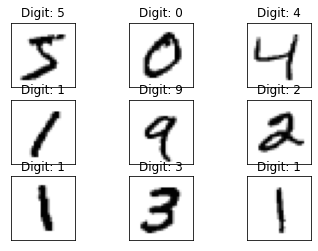

In [78]:
#1. Plot first 9 images
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_digits[i], cmap=plt.cm.binary)
    plt.title("Digit: {}".format(train_labels[i]))
    plt.tight_layout()
plt.show()

In [79]:
#2. Prepare the data
train_digits = train_digits.reshape(60000,28,28,1)
train_labels = tf.keras.utils.to_categorical(train_labels, 10)

test_digits = test_digits.reshape(10000,28,28,1) 
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [80]:
#3. Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [81]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai

In [82]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [83]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 576)              

In [84]:
#4. Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_digits, train_labels, epochs=10, 
                    validation_data=(test_digits, test_labels))

Epoch 1/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1396 - accuracy: 0.9570 - val_loss: 0.0704 - val_accuracy: 0.9762
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0459 - accuracy: 0.9862 - val_loss: 0.0413 - val_accuracy: 0.9868
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0336 - accuracy: 0.9893 - val_loss: 0.0348 - val_accuracy: 0.9898
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0250 - accuracy: 0.9922 - val_loss: 0.0327 - val_accuracy: 0.9902
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0195 - accuracy: 0.9940 - val_loss: 0.0342 - val_accuracy: 0.9892
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0164 - accuracy: 0.9947 - val_loss: 0.0306 - val_accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0135 - accuracy: 0.9956 - val_loss: 0.0343 -

313/313 - 2s - loss: 0.0344 - accuracy: 0.9904 - 2s/epoch - 5ms/step


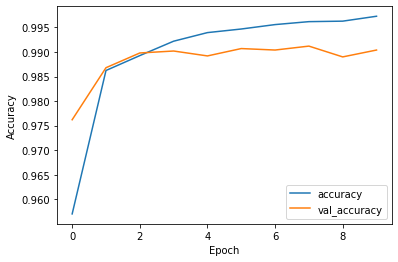

In [96]:
#5. Plot the history of model training against epoch.
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_digits,  test_labels, verbose=2)

In [86]:
#6. Evaluate
print(test_acc)

0.9904000163078308
